In [2]:
from IPython.display import Image

# 简单的自编码
　　我们首先通过构建一个简单的自编码器来压缩MNIST数据集。借助自编码，我们将输入数据通过编码器进行传输，从而对输入进行压缩表示。然后，在通过解码器来重建输入数据。通常，编码器和解码器使用神经网络来构建，通过数据进行训练。

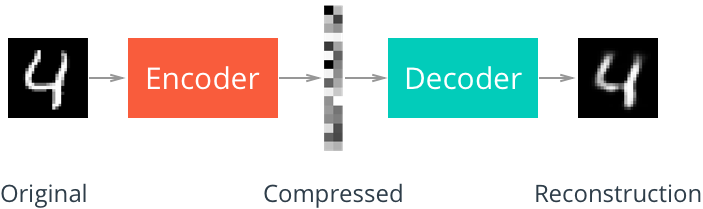

In [2]:
Image('https://github.com/udacity/deep-learning/raw/\
35ad0789cfb4a5d91e9adf8000f0b42be6d37c3b/autoencoder/assets/autoencoder_1.png')

In [11]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


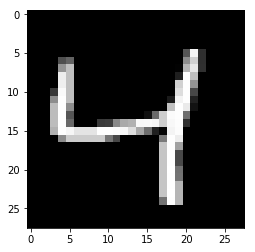

In [7]:
# MNIST数据集的一个样本例子
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

　　我们将这些图像展开成784长度的向量来训练自编码器。数据集的图片已经做过标准化处理，值都在0到1之间。开始建立一个基本的单一使用relu激活函数的隐藏层的自编码器，该图层将用作压缩表示。即编码器由输入层和隐藏层组成。解码器由隐藏层和输出层组成。因为图片已经标准化为0到1之间，我们需要使用对输出层使用sigmoid函数来匹配输入的值。

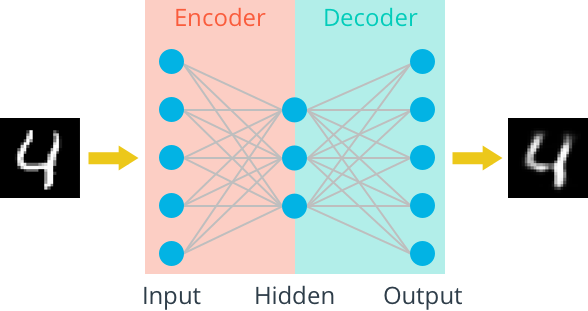

In [3]:
Image('https://github.com/udacity/deep-learning/raw/\
35ad0789cfb4a5d91e9adf8000f0b42be6d37c3b/autoencoder/assets/simple_autoencoder.png')

In [18]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# 隐藏层的输出
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# 输出层的概率
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

##  训练

In [19]:
# 创建一个session
sess = tf.Session()

In [20]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for i in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

#         print("Epoch: {}/{}...".format(e+1, epochs),
#               "Training loss: {:.4f}".format(batch_cost))

## 检查结果
　　画了一些测试图片及重构图。大多数情况下，除了某些部分模糊外，看起来还是不错的。

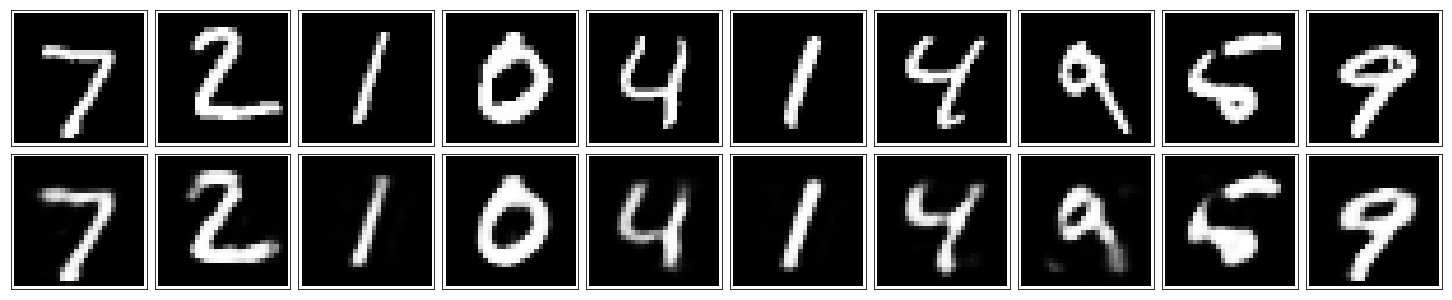

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20, 4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [22]:
sess.close()

## 总结
- 三层网络，输入层、隐藏层和输出层，其中编码层为输入层和隐藏层，即隐藏层的输出为压缩表示编码，隐藏层和输出层为解码输出；
- 输出层的y值为输入层的输入，所以为无监督学习；
- 当数据过大时，先用自编码对数据进行压缩，即使用隐藏层的输出（压缩的编码）作为其他网络的输入，其作用类似于PCA降维，但是效果比PCA降维更好，它是属于非线性的降维。